# Importar librerias

In [42]:
import pandas as pd
import numpy as np

# Cargar datos para crear un Data Frame

In [3]:
df = pd.read_csv('Pokemon.csv', index_col='#')

La unidad cánonica de Pandas para mostrar datos es una estructura llamada Data Frame que es muy parecida a una Spreadsheet de Excel.

# Vistazo a las primeras filas

In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Trabajando con Series

In [5]:
type(df['Name'])

pandas.core.series.Series

## Acceder a ciertas columnas o filas

In [6]:
# Equivalente a df.Name
df['Name']

#
1                  Bulbasaur
2                    Ivysaur
3                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
719                  Diancie
719      DiancieMega Diancie
720      HoopaHoopa Confined
720       HoopaHoopa Unbound
721                Volcanion
Name: Name, Length: 800, dtype: object

In [7]:
#El metodo all compara las filas completas
(df.Name == df['Name']).all()

True

Un Pandas "Series" es lo que representa a un DataFrame. Este objeto cuenta con diferentes metodos que permite responder preguntas sobre el mismo.

** ¿Cuál es el elemento de la columna "Total" más grande? **

In [8]:
df.Total.max()

780

** ¿Cuál es el elemento de la columna "Total" más grande? **

In [9]:
total_max = df['Total'].max()

In [10]:
#Mascara booleana
max_boolean = df['Total'] == total_max
df[max_boolean]['Name']

#
150      MewtwoMega Mewtwo X
150      MewtwoMega Mewtwo Y
384    RayquazaMega Rayquaza
Name: Name, dtype: object

**¿Cuál es el "Speed" promedio?**

In [11]:
df['Speed'].mean()

68.2775

**¿Cómo son los valores estadisticos de  "Attack"?**

Pandas nos permite hacer muchas visualizaciones, tanto de los Series como de los DataFrames. Con esto nos permite tener un vistazo rápido de la forma de los datos.


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Attack')

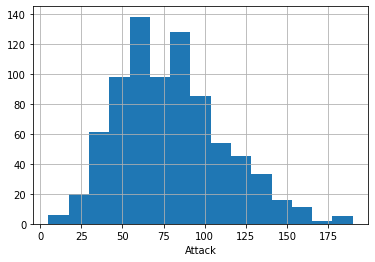

In [29]:
fig, ax = plt.subplots()
df['Attack'].hist(bins=15)
plt.xlabel('Attack')



Para verificar que la distribución del histograma es correcta pueden consultarse lo valores de máximo y mínimo de la variable

In [30]:
df['Attack'].max()

190

In [32]:
df['Attack'].min()

5

**¿Cuántos pokemones "Type 1" y "Type 2" tenemos?**

In [35]:
df['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Rock        14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [34]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

## Aggregation

**¿Cuál es el "Total" promedio de los tipos de Pokemon "Type 1" y "Type 2"**

In [54]:
df.groupby('Type 1')['Total'].mean().sort_values(ascending=False)

Type 1
Dragon      550.531250
Steel       487.703704
Flying      485.000000
Psychic     475.947368
Fire        458.076923
Rock        453.750000
Dark        445.741935
Electric    443.409091
Ghost       439.562500
Ground      437.500000
Ice         433.458333
Water       430.455357
Grass       421.142857
Fighting    416.444444
Fairy       413.176471
Normal      401.683673
Poison      399.142857
Bug         378.927536
Name: Total, dtype: float64

In [55]:
df.groupby('Type 2')['Total'].mean().sort_values(ascending=False)

Type 2
Dragon      526.166667
Fighting    525.846154
Ice         525.714286
Fire        506.250000
Steel       485.227273
Dark        484.400000
Psychic     479.060606
Electric    455.333333
Flying      452.546392
Ground      444.342857
Rock        434.642857
Ghost       430.714286
Water       418.214286
Fairy       417.956522
Normal      411.500000
Grass       408.920000
Poison      396.500000
Bug         393.333333
Name: Total, dtype: float64

**¿Cuál es el "Attack" máximo de "Type 1" y "Type 2" de Pokemon?**

In [61]:
df.groupby(['Type 1', 'Type 2'] )['Attack'].max().sort_values(ascending=False)

Type 1    Type 2  
Psychic   Fighting    190
Bug       Fighting    185
Ground    Fire        180
Dragon    Flying      180
          Ice         170
                     ... 
Water     Fairy        50
Ice       Psychic      50
Fairy     Flying       50
Electric  Ghost        50
Bug       Water        30
Name: Attack, Length: 136, dtype: int64

Es interesante observar las combinaciones anteriores, ya que con eso se puede entender cuales son las combinaciones que junntas producen un mayor ataque.

## Visualización con Seaborn

In [74]:
import seaborn as sns
from scipy.stats import stats 

**Visualizar una columna contra otra**

A continuación se va a mostrar la relacion que presentan los valores de la columna "Sp. Atk" y "Sp. Def" 

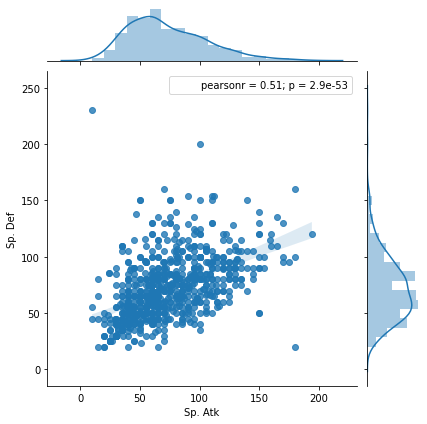

In [76]:
sns.jointplot(x='Sp. Atk', y = 'Sp. Def', data=df, kind='reg', stat_func=stats.pearsonr)

In [66]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**Crear un boxplot de las columnas que nos importan**

Para poder mostrar la visualizacion de los boxplots de cada una de las columnas resulta de utilidad quitar algunas de las variables que no son númericas.

In [80]:
df_reduced = df.drop(['Name', 'Total', 'Generation', 'Legendary'], axis=1)

<AxesSubplot:>

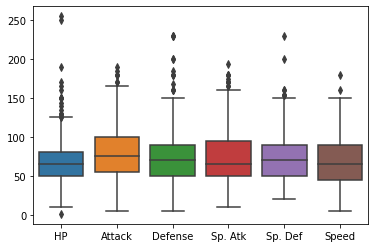

In [83]:
sns.boxplot(data = df_reduced)